In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error

In [2]:
dataset = pd.read_csv("parkinsons_updrs.data")
dataset

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [3]:
dataset.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [4]:
m_UPDRS = dataset.iloc[:, 4].values
t_UPDRS = dataset.iloc[:, 5].values
m_UPDRS

array([28.199, 28.447, 28.695, ..., 21.495, 21.007, 20.513])

In [5]:
t_UPDRS

array([34.398, 34.894, 35.389, ..., 32.495, 32.007, 31.513])

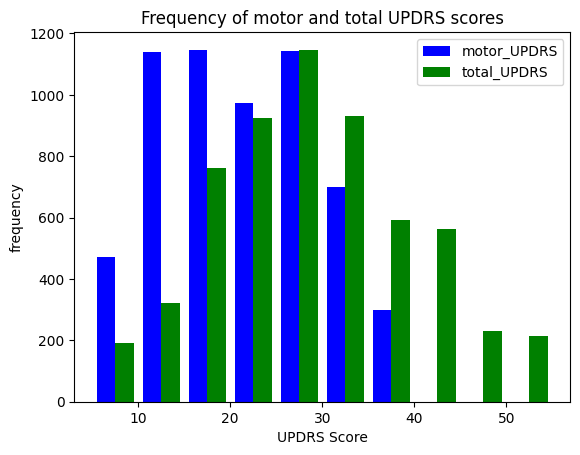

In [6]:
plt.hist([m_UPDRS, t_UPDRS], color = ['blue', 'green'])
plt.xlabel('UPDRS Score')
plt.ylabel('frequency')
legend = ['motor_UPDRS', 'total_UPDRS']
plt.legend(legend)
plt.title('Frequency of motor and total UPDRS scores')
plt.show()

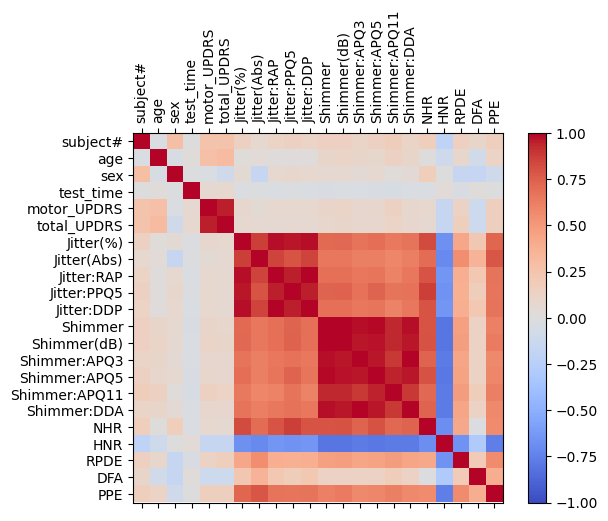

In [7]:
corr = dataset.corr()
fig = plt.figure()
ax= fig.add_subplot(111)
cax= ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(dataset.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation = 90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)
plt.show()

In [8]:
X = dataset.iloc[:, [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]].values
y = dataset.iloc[:, [4, 5]].values

In [9]:
X

array([[ 1.     , 72.     ,  0.     , ...,  0.41888,  0.54842,  0.16006],
       [ 1.     , 72.     ,  0.     , ...,  0.43493,  0.56477,  0.1081 ],
       [ 1.     , 72.     ,  0.     , ...,  0.46222,  0.54405,  0.21014],
       ...,
       [42.     , 61.     ,  0.     , ...,  0.47792,  0.57888,  0.14157],
       [42.     , 61.     ,  0.     , ...,  0.56865,  0.56327,  0.14204],
       [42.     , 61.     ,  0.     , ...,  0.58608,  0.57077,  0.15336]])

In [10]:
y

array([[28.199, 34.398],
       [28.447, 34.894],
       [28.695, 35.389],
       ...,
       [21.495, 32.495],
       [21.007, 32.007],
       [20.513, 31.513]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

In [12]:
X_train

array([[28.     , 74.     ,  1.     , ...,  0.7079 ,  0.71898,  0.25354],
       [ 1.     , 72.     ,  0.     , ...,  0.41898,  0.54621,  0.21898],
       [18.     , 65.     ,  0.     , ...,  0.52529,  0.62763,  0.17824],
       ...,
       [12.     , 62.     ,  0.     , ...,  0.55651,  0.69895,  0.325  ],
       [19.     , 55.     ,  0.     , ...,  0.51553,  0.73339,  0.34876],
       [20.     , 67.     ,  0.     , ...,  0.47292,  0.77725,  0.23529]])

In [13]:
X_test

array([[41.     , 68.     ,  1.     , ...,  0.55251,  0.70003,  0.25145],
       [35.     , 71.     ,  0.     , ...,  0.64566,  0.7499 ,  0.41199],
       [23.     , 59.     ,  1.     , ...,  0.50386,  0.69314,  0.17536],
       ...,
       [ 3.     , 57.     ,  0.     , ...,  0.56542,  0.55683,  0.19311],
       [11.     , 55.     ,  0.     , ...,  0.38905,  0.67862,  0.18004],
       [35.     , 71.     ,  0.     , ...,  0.54586,  0.71325,  0.24244]])

In [14]:
y_train

array([[31.546 , 39.273 ],
       [29.682 , 37.363 ],
       [ 6.    ,  7.8841],
       ...,
       [15.    , 23.122 ],
       [18.    , 26.002 ],
       [11.117 , 16.559 ]])

In [15]:
y_test

array([[29.635, 37.635],
       [36.153, 54.153],
       [12.664, 26.443],
       ...,
       [25.956, 29.927],
       [20.028, 23.037],
       [36.153, 54.153]])

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)
predictions1 = model.predict(X_test)
predictions1

array([[23.39996145, 30.8863872 ],
       [27.42687831, 37.89447796],
       [18.60789675, 24.54216731],
       ...,
       [19.21840969, 26.02273762],
       [16.44272816, 22.15016948],
       [24.06339261, 33.57984859]])

In [19]:
mae1 = mean_absolute_error(y_test, predictions1)
print("Mean Absolute Error:", mae1)

Mean Absolute Error: 6.5918753107737444


In [20]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Calculate MAPE
mape1 = mean_absolute_percentage_error(y_test, predictions1)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape1 * 100))

Mean Absolute Percentage Error (MAPE): 33.11%


In [21]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Create and train the SVM regressor model for motor UPDRS
svm_regressor_motor = SVR(kernel='rbf', C=100, gamma='auto')
svm_regressor_motor.fit(X_train, y_train[:, 0])  # Use only the motor UPDRS values

# Make predictions for motor UPDRS
predictions_motor = svm_regressor_motor.predict(X_test)

# Calculate Mean Absolute Error (MAE) for motor UPDRS
mae_motor = mean_absolute_error(y_test[:, 0], predictions_motor)
print("Mean Absolute Error for Motor UPDRS:", mae_motor)

Mean Absolute Error for Motor UPDRS: 0.5622676400664526


In [22]:
svm_regressor_total = SVR(kernel='rbf', C=100, gamma='auto')
svm_regressor_total.fit(X_train, y_train[:, 1])  # Use only the total UPDRS values

# Make predictions for total UPDRS
predictions_total = svm_regressor_total.predict(X_test)

# Calculate Mean Absolute Error (MAE) for total UPDRS
mae_total = mean_absolute_error(y_test[:, 1], predictions_total)
print("Mean Absolute Error for Total UPDRS:", mae_total)

Mean Absolute Error for Total UPDRS: 0.6744249811062173


In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of k values to try
k_values = [3, 5, 7, 10]

# Iterate over each k value
for k in k_values:
    # Create a k-NN regressor model with current k value
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # Train the model
    knn_regressor.fit(X_train, y_train)
    
    # Make predictions
    predictions_knn = knn_regressor.predict(X_test)
    
    # Calculate Mean Absolute Error (MAE)
    mae_knn = mean_absolute_error(y_test, predictions_knn)
    
    # Print MAE for current k value
    print("Mean Absolute Error (k =", k, "):", mae_knn)

Mean Absolute Error (k = 3 ): 0.8764625673758859
Mean Absolute Error (k = 5 ): 2.2802084765957438
Mean Absolute Error (k = 7 ): 3.4447468571428574
Mean Absolute Error (k = 10 ): 4.186119221276598


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of n_estimators values to try
n_estimators_values = [10, 50, 100, 200]

# Iterate over the list of n_estimators values
for n_estimators in n_estimators_values:
    # Create a Random Forest Regressor model with the current n_estimators value
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_test, predictions)
    
    # Print the results
    print(f"n_estimators={n_estimators}: Mean Absolute Error={mae}")


n_estimators=10: Mean Absolute Error=0.14069636170212746
n_estimators=50: Mean Absolute Error=0.12493164680851016
n_estimators=100: Mean Absolute Error=0.11671323531914853
n_estimators=200: Mean Absolute Error=0.11411627340425515


In [25]:
X_variables = dataset.iloc[:, [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]]
dataset_list = list(X_variables.columns)

In [26]:
X_variables

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [27]:
importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(dataset_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: subject#             Importance: 0.5
Variable: age                  Importance: 0.34
Variable: test_time            Importance: 0.07
Variable: DFA                  Importance: 0.05
Variable: sex                  Importance: 0.02
Variable: RPDE                 Importance: 0.01
Variable: Jitter(%)            Importance: 0.0
Variable: Jitter(Abs)          Importance: 0.0
Variable: Jitter:RAP           Importance: 0.0
Variable: Jitter:PPQ5          Importance: 0.0
Variable: Jitter:DDP           Importance: 0.0
Variable: Shimmer              Importance: 0.0
Variable: Shimmer(dB)          Importance: 0.0
Variable: Shimmer:APQ3         Importance: 0.0
Variable: Shimmer:APQ5         Importance: 0.0
Variable: Shimmer:APQ11        Importance: 0.0
Variable: Shimmer:DDA          Importance: 0.0
Variable: NHR                  Importance: 0.0
Variable: HNR                  Importance: 0.0
Variable: PPE                  Importance: 0.0


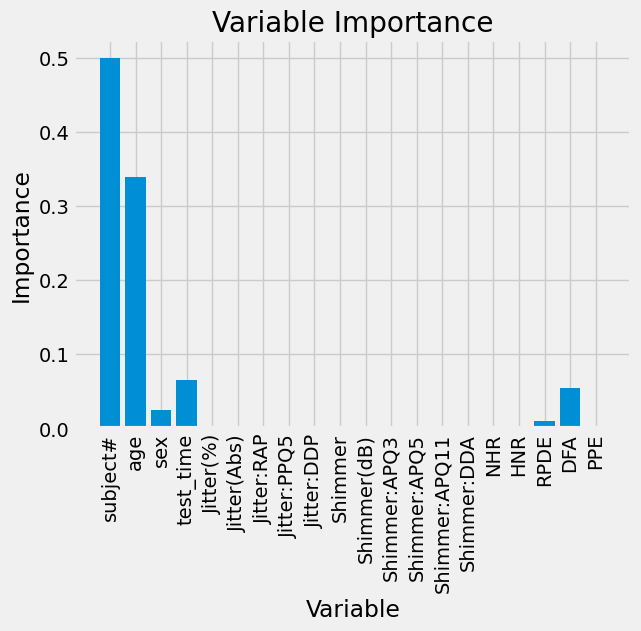

In [28]:
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, dataset_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importance')

In [30]:
X_new_6 = dataset.iloc[:, [0, 1, 2, 3, 19, 20]].values
from sklearn.model_selection import train_test_split
X_train_new_6, X_test_new_6, y_train_new, y_test_new = train_test_split(X_new_6, y, test_size = 0.15, random_state = 0)
X_train_new_6

array([[  4.     ,  74.     ,   0.     ,  44.69   ,   0.62928,   0.59326],
       [ 31.     ,  75.     ,   0.     , 188.3    ,   0.5439 ,   0.79194],
       [ 18.     ,  65.     ,   0.     , 130.39   ,   0.46471,   0.64498],
       ...,
       [ 12.     ,  62.     ,   0.     , 175.19   ,   0.55651,   0.69895],
       [ 19.     ,  55.     ,   0.     , 195.79   ,   0.51553,   0.73339],
       [ 20.     ,  67.     ,   0.     , 144.92   ,   0.47292,   0.77725]])

In [34]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 10, max_features=6, random_state = 0)
regressor.fit(X_train_new_6, y_train_new)
y_pred_new_6 = regressor.predict(X_test_new_6)
y_pred_new_6

array([[29.6352, 37.6352],
       [36.1527, 54.1527],
       [12.664 , 26.4429],
       ...,
       [12.412 , 26.274 ],
       [23.899 , 31.1457],
       [33.204 , 41.204 ]])

In [35]:
mae_6 = mean_absolute_error(y_test_new,y_pred_new_6)
    
# Print the results
print(f"Mean Absolute Error={mae_6}")

Mean Absolute Error=0.07605010770975124


In [36]:
X_new = dataset.iloc[:, [0, 1, 3]].values
y_new = dataset.iloc[:, [4, 5]].values

In [37]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.15, random_state = 0)

In [38]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 10, max_features=3, random_state = 0)
regressor.fit(X_train_new, y_train_new)
y_pred_new = regressor.predict(X_test_new)
y_pred_new

array([[29.6351, 37.6351],
       [36.1528, 54.1528],
       [12.664 , 26.4429],
       ...,
       [12.412 , 26.274 ],
       [23.888 , 31.107 ],
       [33.204 , 41.204 ]])

In [39]:
mae_3 = mean_absolute_error(y_test_new,y_pred_new)
    
# Print the results
print(f"Mean Absolute Error={mae_3}")

Mean Absolute Error=0.00890322828846021
